### **1. IMPORTING LIBRARIES**

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from IPython.display import display, HTML

In [207]:
df = pd.read_csv('/content/house_price.csv')

### **2. DATA EXPLORATION**

In [208]:
df

,area_type,location,society,size,total_sqft,sqft,bath,balcony,possession date,price
0,Super built-up Area,Electronic City Phase II,Coomee,2 BHK,1056,1056.0,2.0,1.0,44192,39.07
1,Plot Area,Chikka Tirupathi,Theanmp,4 Bedroom,2600,2600.0,5.0,3.0,Ready to move,120.00
2,Built-up Area,Uttarahalli,NaN,3 BHK,1440,1440.0,2.0,3.0,Ready to move,62.00
3,Super built-up Area,Lingadheeranahalli,Soiewre,3 BHK,1521,1521.0,3.0,1.0,Ready to move,95.00
4,Super built-up Area,Kothanur,NaN,2 BHK,1200,1200.0,2.0,1.0,Ready to move,51.00
...,...,...,...,...,...,...,...,...,...,...
13309,Built-up Area,Whitefield,ArsiaEx,5 Bedroom,3453,3453.0,4.0,0.0,Ready to move,231.00
13310,Super built-up Area,Richards Town,NaN,4 BHK,3600,3600.0,5.0,NaN,Ready to move,400.00
13311,Built-up Area,Raja Rajeshwari Nagar,Mahla T,2 BHK,1141,1141.0,2.0,1.0,Ready to move,60.00
13312,Super built-up Area,Padmanabhanagar,SollyCl,4 BHK,4689,4689.0,4.0,1.0,45160,488.00


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13314 entries, 0 to 13313
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area_type        13314 non-null  object 
 1   location         13314 non-null  object 
 2   society          7817 non-null   object 
 3   size             13298 non-null  object 
 4   total_sqft       13314 non-null  object 
 5   sqft             13314 non-null  float64
 6   bath             13241 non-null  float64
 7   balcony          12706 non-null  float64
 8   possession date  13314 non-null  object 
 9   price            13314 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.0+ MB


In [210]:
print(df.columns)

Index(['area_type', 'location', 'society', 'size', 'total_sqft', 'sqft',
       'bath', 'balcony', 'possession date', 'price'],
      dtype='object')


In [211]:
df.describe()

,sqft,bath,balcony,price
count,1.331400e+04,13241.000000,12706.000000,13314.000000
mean,1.817241e+03,2.691564,1.584133,112.545076
std,1.427869e+04,1.339904,0.817198,148.998426
min,4.500000e+01,1.000000,0.000000,8.000000
25%,1.100000e+03,2.000000,1.000000,50.000000
50%,1.277000e+03,2.000000,2.000000,72.000000
75%,1.680000e+03,3.000000,2.000000,120.000000
max,1.306800e+06,40.000000,3.000000,3600.000000


In [212]:
df.dtypes

area_type           object
location            object
society             object
size                object
total_sqft          object
sqft               float64
bath               float64
balcony            float64
possession date     object
price              float64
dtype: object

In [213]:
df.shape

(13314, 10)

### **3. EXPLORARTORY DATA ANALYSIS**

In [214]:
df.isnull().sum()

area_type             0
location              0
society            5497
size                 16
total_sqft            0
sqft                  0
bath                 73
balcony             608
possession date       0
price                 0
dtype: int64

In [215]:
df['area_type'].value_counts()

Super built-up  Area    8789
Built-up  Area          2414
Plot  Area              2024
Carpet  Area              87
Name: area_type, dtype: int64

In [216]:
df['location'].value_counts()

Whitefield           540
Sarjapur  Road       399
Electronic City      302
Kanakpura Road       273
Thanisandra          234
                    ... 
Meenakshi Layout       1
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64

In [217]:
df['society'].value_counts()

GrrvaGr    80
PrarePa    76
Prtates    59
Sryalan    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [218]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4309
4 Bedroom      826
4 BHK          590
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      295
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       45
6 BHK           30
7 BHK           16
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [219]:
df['possession date'].value_counts()

Ready to move    10591
44158                6
43562                6
44154                6
44294                6
                 ...  
44739                1
43628                1
45029                1
43823                1
43820                1
Name: possession date, Length: 1430, dtype: int64

### **4. DATA VIZUALIZATION**

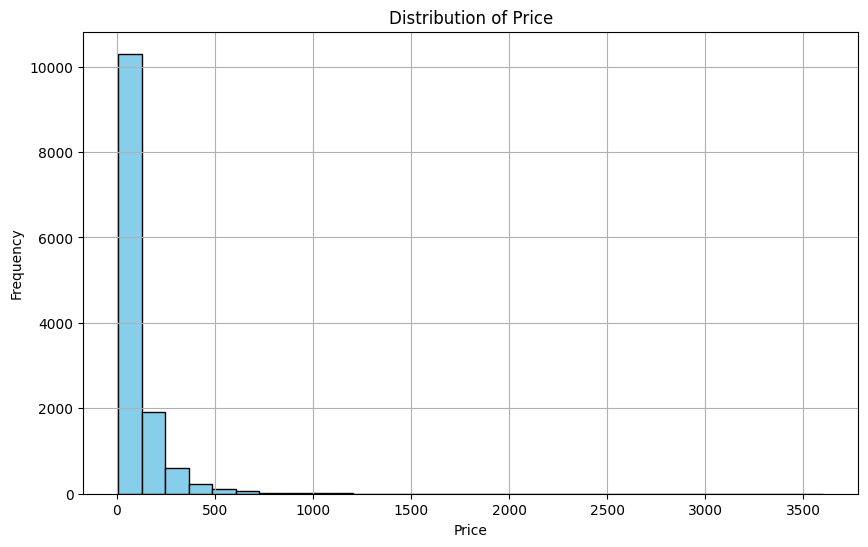

In [220]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

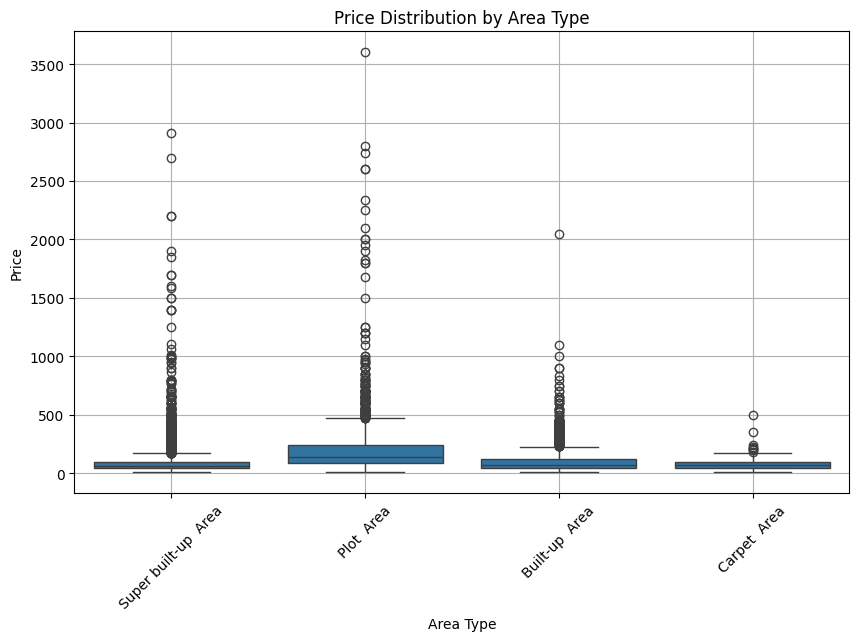

In [221]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='area_type', y='price', data=df)
plt.title('Price Distribution by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

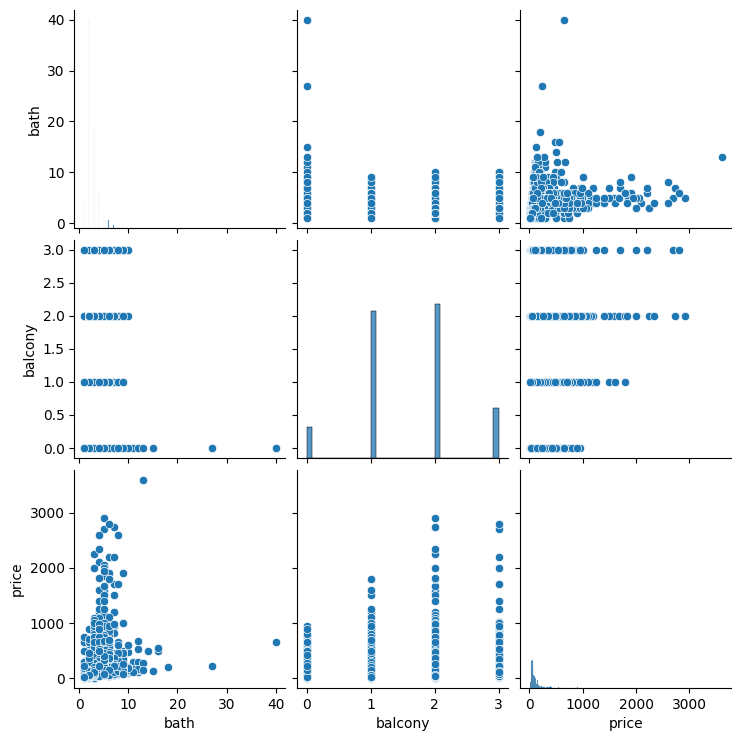

In [222]:
sns.pairplot(df[['total_sqft', 'bath', 'balcony', 'price']])
plt.show()

<ipython-input-223-a506359708a4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[['total_sqft', 'bath', 'balcony', 'price']].corr(), annot=True, cmap='coolwarm', fmt=".2f")


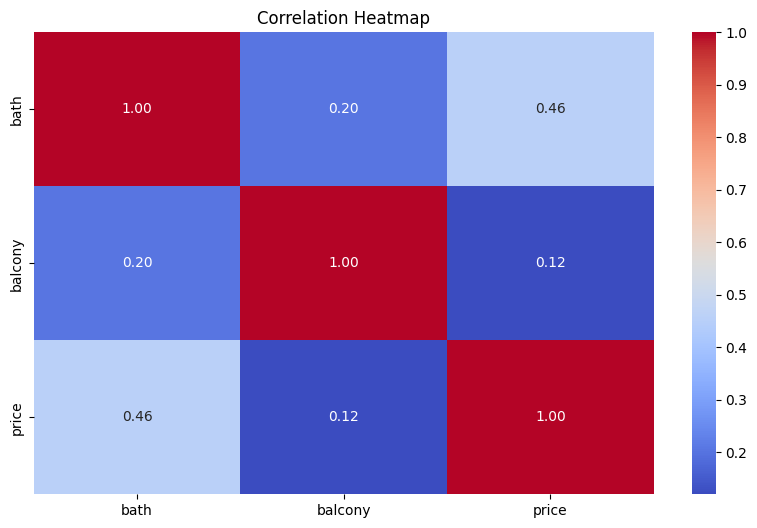

In [223]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['total_sqft', 'bath', 'balcony', 'price']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### **5. DATA PREPEOCESSING**

In [224]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['price'] > lower_bound) & (df['price'] < upper_bound)]

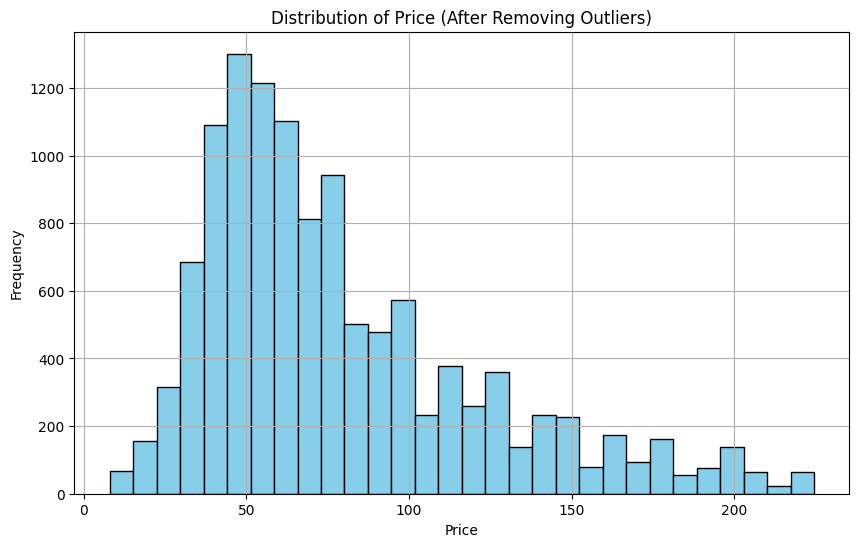

In [225]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Price (After Removing Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11997 entries, 0 to 13313
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area_type        11997 non-null  object 
 1   location         11997 non-null  object 
 2   society          7230 non-null   object 
 3   size             11983 non-null  object 
 4   total_sqft       11997 non-null  object 
 5   sqft             11997 non-null  float64
 6   bath             11941 non-null  float64
 7   balcony          11616 non-null  float64
 8   possession date  11997 non-null  object 
 9   price            11997 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.0+ MB


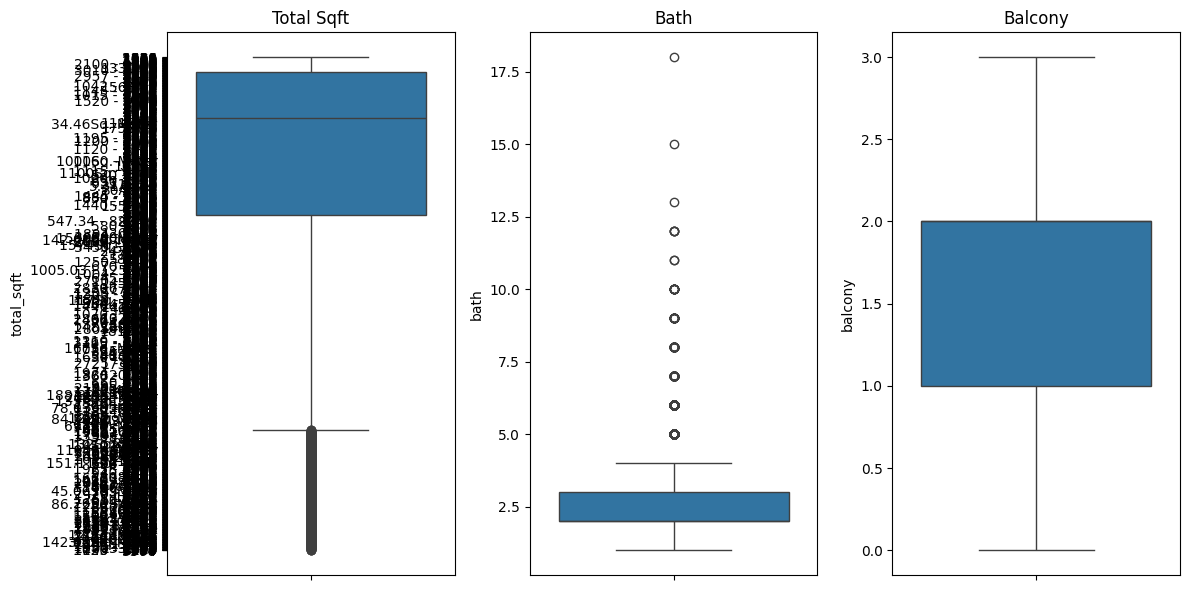

In [227]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y='total_sqft', data=df)
plt.title('Total Sqft')

plt.subplot(1, 3, 2)
sns.boxplot(y='bath', data=df)
plt.title('Bath')

plt.subplot(1, 3, 3)
sns.boxplot(y='balcony', data=df)
plt.title('Balcony')

plt.tight_layout()
plt.show()

In [228]:
Q1_bath = df['bath'].quantile(0.25)
Q3_bath = df['bath'].quantile(0.75)
IQR_bath = Q3_bath - Q1_bath
lower_bound_bath = Q1_bath - 1.5 * IQR_bath
upper_bound_bath = Q3_bath + 1.5 * IQR_bath
df = df[(df['bath'] > lower_bound_bath) & (df['bath'] < upper_bound_bath)]

In [229]:
Q1_balcony = df['balcony'].quantile(0.25)
Q3_balcony = df['balcony'].quantile(0.75)
IQR_balcony = Q3_balcony - Q1_balcony
lower_bound_balcony = Q1_balcony - 1.5 * IQR_balcony
upper_bound_balcony = Q3_balcony + 1.5 * IQR_balcony
df = df[(df['balcony'] > lower_bound_balcony) & (df['balcony'] < upper_bound_balcony)]

In [230]:
df.describe()

,sqft,bath,balcony,price
count,1.114900e+04,11149.000000,11149.000000,11149.000000
mean,1.577301e+03,2.317158,1.554220,75.132544
std,1.429479e+04,0.694727,0.788807,40.119988
min,4.500000e+01,1.000000,0.000000,8.000000
25%,1.075000e+03,2.000000,1.000000,46.700000
50%,1.226000e+03,2.000000,2.000000,65.000000
75%,1.512000e+03,3.000000,2.000000,92.000000
max,1.306800e+06,4.000000,3.000000,224.000000


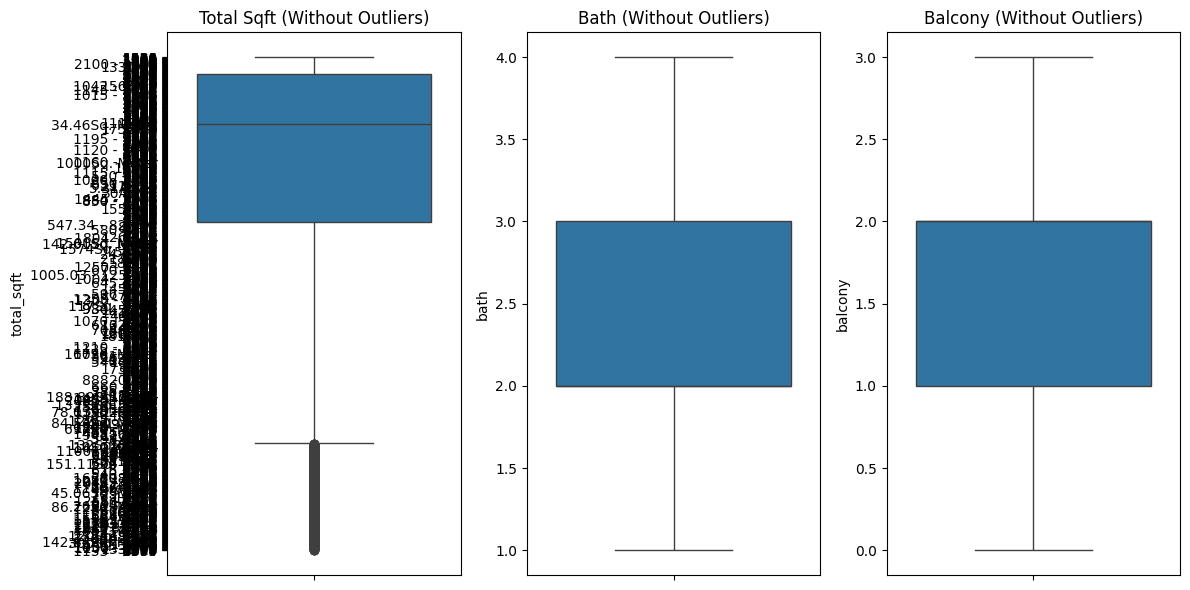

In [231]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y='total_sqft', data=df)
plt.title('Total Sqft (Without Outliers)')

plt.subplot(1, 3, 2)
sns.boxplot(y='bath', data=df)
plt.title('Bath (Without Outliers)')

plt.subplot(1, 3, 3)
sns.boxplot(y='balcony', data=df)
plt.title('Balcony (Without Outliers)')

plt.tight_layout()
plt.show()

### **5. FEATURES SELECTION**

In [232]:
def convert_to_sqft(x):
    try:
        if isinstance(x, float):
            return x
        elif 'Sq. Meter' in x:
            return float(x.split(' ')[0]) * 10.7639
        elif 'Acres' in x:
            return float(x.split(' ')[0]) * 43560
        else:
            return float(x)
    except (ValueError, AttributeError):
        return None

In [233]:
df['total_sqft'] = df['total_sqft'].apply(convert_to_sqft)
df.dropna(subset=['total_sqft'], inplace=True)

In [271]:
# Q1. The model should have at least 5 features

selected_features = ['total_sqft', 'bath', 'balcony', 'size', 'location', 'price']
df_selected = df[selected_features]

In [235]:
df_selected = df[selected_features].copy()
df_selected.dropna(inplace=True)

In [236]:
X = df_selected.drop('price', axis=1)
y = df_selected['price']

In [237]:
X = pd.get_dummies(X, columns=['location'], drop_first=True)

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [239]:
def clean_size(x):
    pattern = r'\d+'
    matches = re.findall(pattern, x)
    if matches:
        return int(matches[0])
    else:
        return None

In [240]:
df_selected['size'] = df_selected['size'].apply(clean_size)

In [241]:
df_selected.dropna(inplace=True)

In [242]:
X = df_selected.drop('price', axis=1)
y = df_selected['price']

In [243]:
X = pd.get_dummies(X, columns=['location'], drop_first=True)

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [245]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [246]:
y_pred = model.predict(X_test)

In [247]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 342132112.0955049


In [248]:
print("\nModel Coefficients:-")
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


Model Coefficients:-
                          Feature   Coefficient
0                      total_sqft  1.120901e-02
1                            bath  2.114990e+01
2                         balcony -1.052482e+00
3                            size  8.726168e+00
4             location_ Banaswadi  1.597426e+01
...                           ...           ...
1133          location_sankeswari  1.445750e+01
1134   location_sapthagiri Layout  0.000000e+00
1135  location_singapura paradise  8.881784e-16
1136            location_tc.palya  5.491146e+00
1137          location_whitefiled -1.968809e+01

[1138 rows x 2 columns]


In [249]:
# Model equation
coefficients_str = " + ".join(["{:.6f} * {}".format(coef, feat) for coef, feat in zip(model.coef_, X.columns)])
model_equation = "Predicted price = {:.6f} + {}".format(model.intercept_, coefficients_str)

In [250]:
# Value of β0 (intercept)
intercept_value = model.intercept_

In [251]:
# Features significance
significant_features = coefficients[coefficients['Coefficient'].abs() > 1]

In [252]:
# Print outputs
print("Model Equation:")
print(model_equation)
print("\nValue of β0 (Intercept):", intercept_value)
print("\nSignificant Features:")
print(significant_features)

Model Equation:
Predicted price = -16.764196 + 0.011209 * total_sqft + 21.149897 * bath + -1.052482 * balcony + 8.726168 * size + 15.974263 * location_ Banaswadi + 30.423899 * location_ Basavangudi + 6.453489 * location_ Bhoganhalli + 52.984811 * location_ Devarabeesana Halli + 0.386736 * location_ Devarachikkanahalli + 5.661900 * location_ Electronic City + 6.217925 * location_ Mysore Highway + 9.949361 * location_ Rachenahalli + 7.948624 * location_ Thanisandra + 29.789896 * location_ Whitefield + 52.615915 * location_ ittamadu + 167.757841 * location_12th cross srinivas nagar banshankari 3rd stage + -3.018626 * location_1st Block BEL Layout + 14.063179 * location_1st Block HBR Layout + 28.452655 * location_1st Block HRBR Layout + 9.876955 * location_1st Block Jayanagar + 27.431373 * location_1st Block Koramangala + 57.894081 * location_1st Phase JP Nagar + 0.261746 * location_1st Stage Domlur + 4.512547 * location_1st Stage Indira Nagar + 4.082206 * location_2nd Block Bel Layout + 9

**1. What is the value of β0 and how do you interpret it?**
1. The value of β0 also known as the intercept term, is approximately -16.094309.
2. This value represents the predicted price of the property when all the other predictor variables (features) are set to zero.
3. In other words, it is the baseline price of the property. However, it's important to note that in real-world scenarios, setting all features to zero may not always be meaningful or feasible, especially for features like 'total_sqft', 'bath', etc.




**2. Which features are significant? Why?**

1. Significant features are those whose coefficients have a notable impact on the predicted price of the property.
2. Based on the provided coefficients, features such as 'bath', 'size', and various 'location' dummy variables appear to be significant.
3. These features have coefficients with substantial magnitudes (e.g., absolute values greater than 1), indicating their significance in predicting the price of the property.
4. The significance of these features could be attributed to various factors such as the number of bathrooms ('bath') and bedrooms ('size'), as well as the desirability or perceived value associated with specific locations.

In [253]:
y_pred = model.predict(X_test)

In [254]:
error = y_test - y_pred
squared_error = error ** 2

In [255]:
results_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred,
    'Error': error,
    'Squared Error': squared_error
})

In [256]:
print(results_df)

       Actual Price  Predicted Price      Error  Squared Error
133          210.00       116.190877  93.809123    8800.151649
12133         84.00        97.528893 -13.528893     183.030944
5033          62.00        76.585304 -14.585304     212.731104
8621          55.47        49.040170   6.429830      41.342709
6396          87.00        72.785927  14.214073     202.039860
...             ...              ...        ...            ...
2478         105.00       127.983892 -22.983892     528.259285
2699          21.00        19.654606   1.345394       1.810084
8357          90.00       143.692727 -53.692727    2882.908959
12765         30.46        51.748817 -21.288817     453.213738
7295          45.00        63.772821 -18.772821     352.418795

[2201 rows x 4 columns]


### **6. EV MATRICS CALCULATION USING ACTUAL VS PREDICTED**

In [257]:
mse = mean_squared_error(y_test, y_pred)

In [258]:
rmse = np.sqrt(mse)

In [259]:
mae = mean_absolute_error(y_test, y_pred)

In [260]:
print("Mean Squared Error (MSE):-", mse)
print("Root Mean Squared Error (RMSE):-", rmse)
print("Mean Absolute Error (MAE):-", mae)

Mean Squared Error (MSE):- 1.1705438212693114e+17
Root Mean Squared Error (RMSE):- 342132112.0955049
Mean Absolute Error (MAE):- 14354085.04462714


### **7. VIZUALIZE THE PREDICTED VS ACTUAL MODEL**

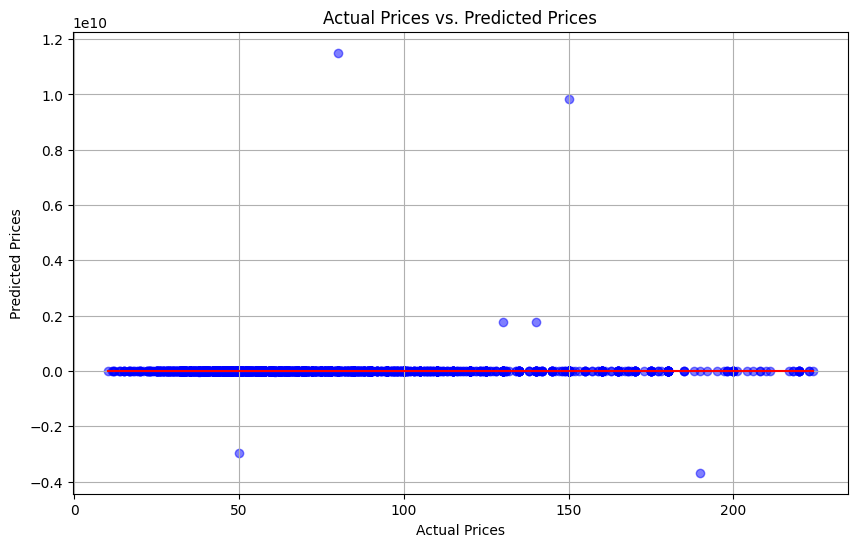

In [261]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

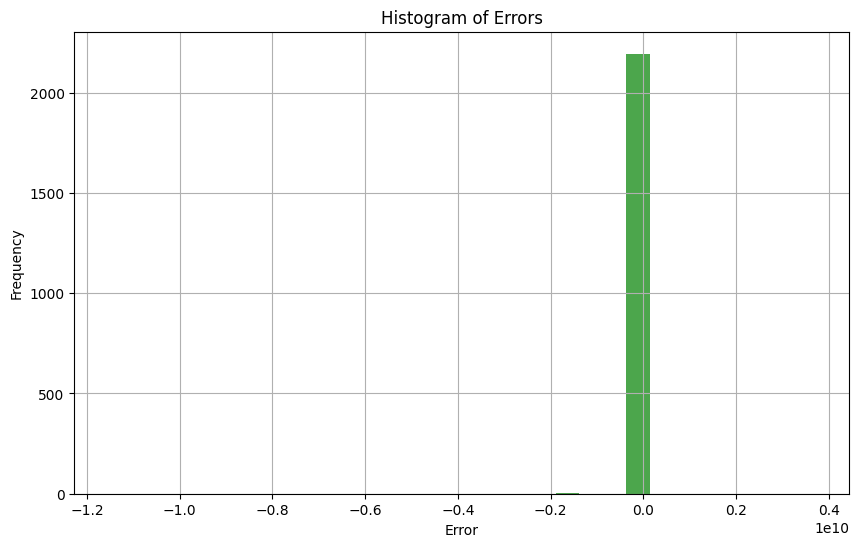

In [262]:
plt.figure(figsize=(10, 6))
plt.hist(error, bins=30, color='green', alpha=0.7)
plt.title('Histogram of Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [263]:
# Q5 ANSWER
final_output_df = df_selected.copy()

In [264]:
output_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred,
    'Error': y_test - y_pred,
    'Squared Error': (y_test - y_pred) ** 2
})

In [265]:
final_output_df = pd.concat([df_selected, output_df], axis=1)

In [266]:
print(final_output_df)

       total_sqft  bath  balcony  size                  location   price  \
0          1056.0   2.0      1.0     2  Electronic City Phase II   39.07   
2          1440.0   2.0      3.0     3               Uttarahalli   62.00   
3          1521.0   3.0      1.0     3        Lingadheeranahalli   95.00   
4          1200.0   2.0      1.0     2                  Kothanur   51.00   
5          1170.0   2.0      1.0     2                Whitefield   38.00   
...           ...   ...      ...   ...                       ...     ...   
13306      1262.0   2.0      2.0     2                 Bellandur   47.00   
13307      1345.0   2.0      1.0     3               Uttarahalli   57.00   
13308      1715.0   3.0      3.0     3         Green Glen Layout  112.00   
13311      1141.0   2.0      1.0     2     Raja Rajeshwari Nagar   60.00   
13313       550.0   1.0      1.0     1              Doddathoguru   17.00   

       Actual Price  Predicted Price      Error  Squared Error  
0             39.07   

In [267]:
final_output_df.dropna(subset=['Actual Price', 'Predicted Price', 'Error', 'Squared Error'], inplace=True)
print(final_output_df)

       total_sqft  bath  balcony  size                  location   price  \
0          1056.0   2.0      1.0     2  Electronic City Phase II   39.07   
4          1200.0   2.0      1.0     2                  Kothanur   51.00   
13         1100.0   2.0      2.0     2                 Gottigere   40.00   
15         1175.0   2.0      2.0     2               Mysore Road   73.50   
20          600.0   1.0      1.0     1                   Kengeri   15.00   
...           ...   ...      ...   ...                       ...     ...   
13296      1075.0   2.0      2.0     2      Annaiah Reddy Layout   48.00   
13298      1187.0   2.0      2.0     2     Raja Rajeshwari Nagar   40.14   
13302      1527.0   3.0      1.0     3         Bannerghatta Road  142.00   
13304      1050.0   2.0      2.0     2              Rachenahalli   52.71   
13311      1141.0   2.0      1.0     2     Raja Rajeshwari Nagar   60.00   

       Actual Price  Predicted Price       Error  Squared Error  
0             39.07  

In [268]:
html_output = final_output_df.to_html(index=False)
display(HTML(html_output))

total_sqft,bath,balcony,size,location,price,Actual Price,Predicted Price,Error,Squared Error
1056.00,2.0,1.0,2,Electronic City Phase II,39.07,39.07,3.641043e+01,2.659569e+00,7.073306e+00
1200.00,2.0,1.0,2,Kothanur,51.00,51.00,5.797024e+01,-6.970244e+00,4.858431e+01
1100.00,2.0,2.0,2,Gottigere,40.00,40.00,5.060628e+01,-1.060628e+01,1.124932e+02
1175.00,2.0,2.0,2,Mysore Road,73.50,73.50,5.582638e+01,1.767362e+01,3.123567e+02
600.00,1.0,1.0,1,Kengeri,15.00,15.00,1.111131e+01,3.888694e+00,1.512194e+01
660.00,1.0,1.0,2,Electronic City,23.10,23.10,2.262392e+01,4.760804e-01,2.266525e-01
1075.00,2.0,1.0,3,Bisuvanahalli,35.00,35.00,4.432019e+01,-9.320189e+00,8.686592e+01
1290.00,2.0,2.0,3,Chikkalasandra,56.12,56.12,6.199006e+01,-5.870061e+00,3.445761e+01
1254.00,3.0,2.0,3,Sarjapur Road,38.00,38.00,9.674673e+01,-5.874673e+01,3.451178e+03
660.00,1.0,0.0,1,Yelahanka,48.00,48.00,2.601301e+01,2.198699e+01,4.834277e+02


In [269]:
# What is the RMSE value of the model on the test dataset?

squared_errors = final_output_df['Error'] ** 2
mean_squared_error = squared_errors.mean()
rmse = np.sqrt(mean_squared_error)

In [270]:
print("Root Mean Squared Error:-", rmse)

Root Mean Squared Error:- 342132112.09550494


In [272]:
final_output_df.to_csv('final_output.csv', index=False)